[View assignment here](assignment.pdf)

# Assignment 1 (15%)
First, turn the categorical variables into dummy variables and explain which category you chose as the reference category. Second, run a regression model where all independent variables are included in a single model. Use Cook’s D to find out if there are any outliers. Note: you will first have to remove missing values first in order to get Cooks D to work. 

After you identified the relevant outliers, go back to the original data and turn these outliers into missing values. 

### Steps to do
0. Import libraries and data
1. Convert categorical variables into dummy variables, deciding on reference categories for each.
2. Remove any missing values from the dataset to prepare it for regression analysis.
3. Run a regression model including all independent variables.
4. Use Cook's D to identify outliers in the dataset.
5. Replace the identified outliers with missing values in the original dataset.

## Step 0. import libraries and import data

In [116]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [117]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,67223,health,off_brand,3.6,11,22.0,22.3,811
1,2,172699,health,premium,4.8,3,3.0,24.3,1875
2,3,136532,toys,off_brand,4.2,8,20.0,40.0,999
3,4,154306,health,premium,3.3,8,15.0,28.0,3566
4,5,183081,health,off_brand,4.7,17,8.0,57.4,876


### 1. Convert categorical variables into dummy variables, deciding on reference categories for each.

In [118]:
data_clean = pd.get_dummies(data, columns=['product_category', 'quality'], drop_first=True)
data_clean = data_clean.astype(float)

### 2. Remove any missing values from the dataset to prepare it for regression analysis.

In [119]:
data_clean = data_clean.dropna()

data_clean.head(), data_clean.isnull().sum()

(   Unnamed: 0  products_sold  satisfaction  discount  retail_price  \
 0         1.0        67223.0           3.6      11.0          22.0   
 1         2.0       172699.0           4.8       3.0           3.0   
 2         3.0       136532.0           4.2       8.0          20.0   
 3         4.0       154306.0           3.3       8.0          15.0   
 4         5.0       183081.0           4.7      17.0           8.0   
 
    perc_physical  market_size  product_category_health  \
 0           22.3        811.0                      1.0   
 1           24.3       1875.0                      1.0   
 2           40.0        999.0                      0.0   
 3           28.0       3566.0                      1.0   
 4           57.4        876.0                      1.0   
 
    product_category_other  product_category_toys  quality_premium  
 0                     0.0                    0.0              0.0  
 1                     0.0                    0.0              1.0  
 2       

### 3. Run a regression model including all independent variables.

In [120]:
X = data_clean.drop(columns=['Unnamed: 0', 'products_sold'])
y = data_clean['products_sold']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

### 4. Use Cook's D to identify outliers in the dataset.
_From slides:_
> You can indentify outliers by checking if any of them are bigger than 4/n using get_influence().cooks_distance


In [121]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

n = len(data_clean)
outlier_threshold = 4/n

outliers = cooks_d > outlier_threshold
outliers_indices = data_clean.index[outliers]

outliers_indices, outlier_threshold

(Index([   5,   25,   28,   31,   36,   75,   85,  102,  138,  145,  150,  168,
         174,  185,  191,  208,  222,  264,  306,  313,  323,  340,  377,  410,
         438,  478,  580,  581,  590,  596,  598,  605,  623,  647,  693,  694,
         706,  719,  722,  782,  799,  804,  824,  830,  839,  901,  907,  908,
         931,  934,  962,  975, 1015, 1095, 1173, 1175, 1209, 1267, 1290, 1329,
        1407, 1482, 1546, 1547, 1559, 1593, 1641, 1655, 1657, 1672, 1706, 1768,
        1821, 1836, 1854, 1867, 1873, 1886, 1916, 1969, 1991, 2024, 2028, 2035,
        2065, 2075, 2113, 2115, 2128, 2130, 2146, 2151, 2168, 2169],
       dtype='int64'),
 0.001968503937007874)

### 5. Replace the identified outliers with missing values in the original dataset.

In [122]:
data_original_with_missing_outliers = data.copy()
data_original_with_missing_outliers.loc[outliers_indices, data.columns[1:]] = None

data_original_with_missing_outliers.isnull().sum().sum(), data_original_with_missing_outliers.shape

(1078, (2250, 9))

# Assignment 2 (15%) 
The original data contained missing values, and if you did assignment 1 correctly some more should be added. Use the correct imputation techniques for dealing with both the categorical and continuous missing values. Explain what you did. After this, check if there are potential issues with multicollinearity, and if there are, explain how you dealt with it. 


### Steps to do
1. Impute missing values (categorical and continuous variables)
2. Check for multicollinearity
3. Address multicollinearity

### 1. Impute missing values

In [123]:
continuous_vars = ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']
categorical_vars = ['product_category_health', 'product_category_other', 'product_category_toys', 'quality_premium']

imputer_continuous = SimpleImputer(strategy='median')
data_clean[continuous_vars] = imputer_continuous.fit_transform(data_clean[continuous_vars])

imputer_categorical = SimpleImputer(strategy='most_frequent')
data_clean[categorical_vars] = imputer_categorical.fit_transform(data_clean[categorical_vars])

missing_values_after_imputation = data_clean.isnull().sum().sum()

missing_values_after_imputation

0

All missing values have been successfully imputed in the dataset. 

For continuous variables _(satisfaction, discount, retail_price, perc_physical, market_size)_, we used the **median** for imputation.

For categorical variables _(product_category_health, product_category_other, product_category_toys, quality_premium)_, we used the **mode** (most frequent category) for imputation.


_This ensures that the dataset no longer contains any missing values, making it suitable for further analysis._

### 2. Check for multicollinearity

#### Using VIF
Personally, I like to use the variance inflation factor, but due to it being explained using a correlation heatmap, I will implement both to see if there are differences in results.

In [124]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,93.530330
1,satisfaction,1.003352
2,discount,1.003594
3,retail_price,1.003519
4,perc_physical,1.158267
5,market_size,1.002880
6,product_category_health,2.563995
7,product_category_other,1.807483
8,product_category_toys,2.569559
9,quality_premium,1.048660


#### multicollinearity conclusions
 - The VIF for all variables except the constant is well below the threshold of 10, indicating that there is no significant multicollinearity among these variables.
 - The const term has a high VIF, which is expected and not a concern because it represents the intercept of the model, not an actual predictor.
 - The variables related to product categories (product_category_health, product_category_other, and product_category_toys) have slightly higher VIFs compared to others but are still below the threshold, indicating a moderate but acceptable level of multicollinearity. This makes sense, as these are categorical values that should total up to about ~1 (not fully 1, as one category is left out of course).

Since there are no variables with a VIF greater than 10, we do not need to take any specific action to address multicollinearity in this model. This means the model is in good shape for analysis without the need for removing or combining variables, or applying dimensionality reduction techniques.

#### Correlation Heatmap

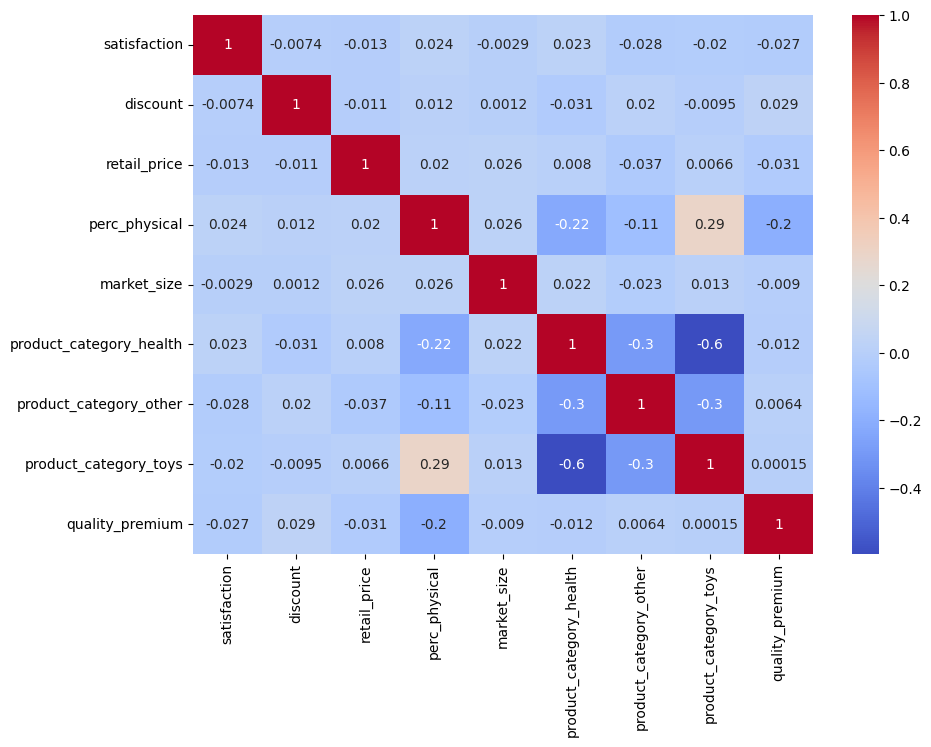

In [125]:
continuous_vars = ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']
categorical_vars = ['product_category_health', 'product_category_other', 'product_category_toys', 'quality_premium']

# Checking for multicollinearity using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data_clean[continuous_vars + categorical_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

In the heatmap we see the same result; The variables related to product categories (product_category_health, product_category_other, and product_category_toys) have a slightly higher correlation (with health and toys having the highest correlation).

#### Conclusion correlations
There is no need for removing variables, as there is no real high correlation. The heatmap and VIF give the same results.

# Assignment 3: (20%)
There might non-linear relationships in the data. Investigate if this is the case and if you find any show it with a scatterplot and a lowess-curve (remember: the dependent variable should be on the y-axis). If you found any, make the correct transformation and test whether this improved the model fit. 

### Steps to do
1. Visualize relationships with scatter plots and lowess curves for each independent variable against products_sold.
2. Identify non-linear relationships based on these visualizations.
3. For any identified non-linear relationships, apply appropriate transformations to the independent variables.
4. Re-fit the regression model with the transformed variables.
5. Compare model fit before and after the transformations to assess improvements.

_We will focus on 'satisfaction, discount, retail_price, perc_physical, and market_size' for this visualization._

In [126]:
data_clean.head()

,Unnamed: 0,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,product_category_health,product_category_other,product_category_toys,quality_premium
0,1.0,67223.0,3.6,11.0,22.0,22.3,811.0,1.0,0.0,0.0,0.0
1,2.0,172699.0,4.8,3.0,3.0,24.3,1875.0,1.0,0.0,0.0,1.0
2,3.0,136532.0,4.2,8.0,20.0,40.0,999.0,0.0,0.0,1.0,0.0
3,4.0,154306.0,3.3,8.0,15.0,28.0,3566.0,1.0,0.0,0.0,1.0
4,5.0,183081.0,4.7,17.0,8.0,57.4,876.0,1.0,0.0,0.0,0.0


### 1. Visualize relationships with scatter plots and lowess curves for each independent variable against products_sold.


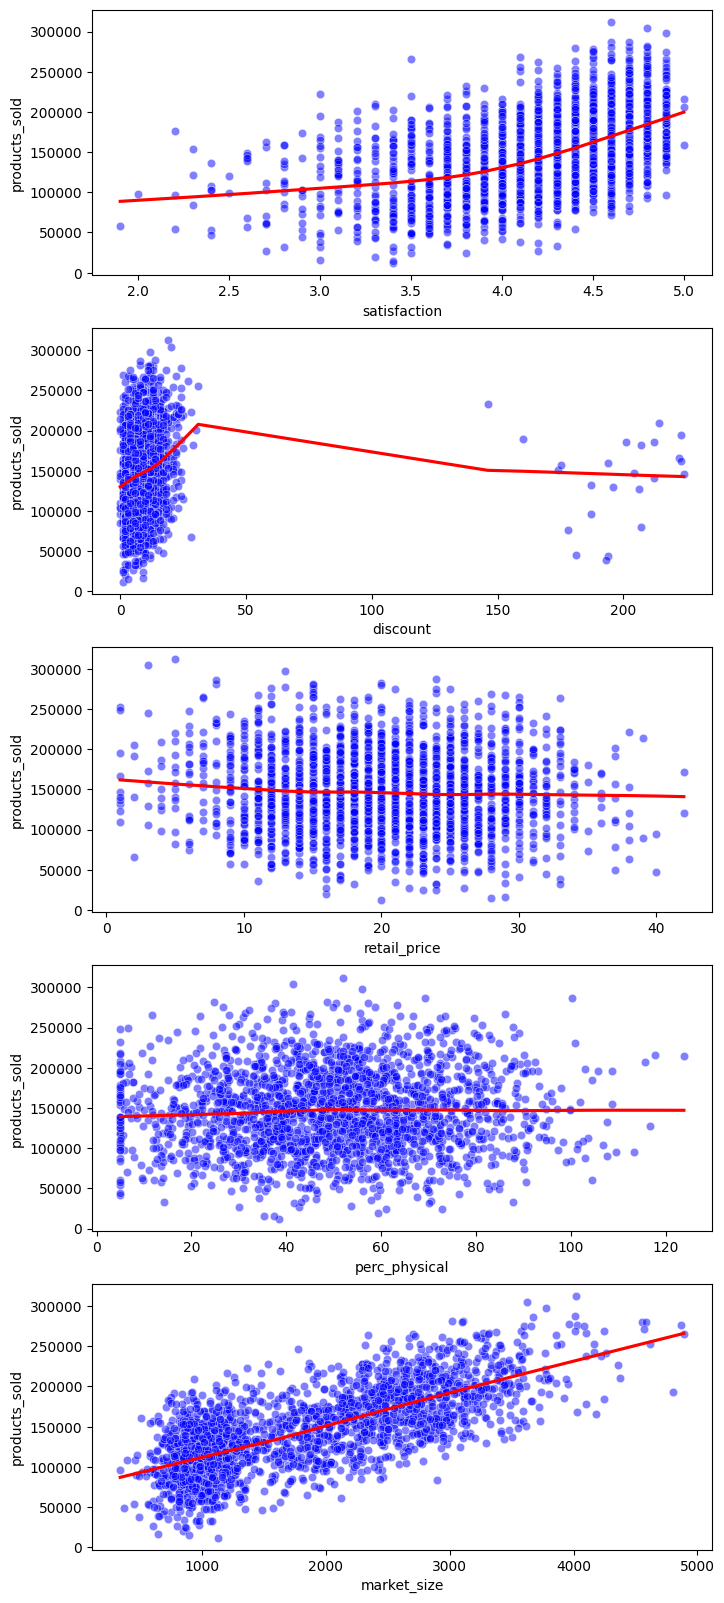

In [127]:
variables_to_check = ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']

fig, axs = plt.subplots(len(variables_to_check), 1, figsize=(8, 20))

for i, var in enumerate(variables_to_check):
    sns.scatterplot(data=data_clean, x=var, y='products_sold', ax=axs[i], color='blue', alpha=0.5)
    sns.regplot(data=data_clean, x=var, y='products_sold', ax=axs[i], scatter=False, color='red', lowess=True)

plt.show()

### 2. Identify non-linear relationships based on these visualizations.
1. Satisfaction seems like a non-linear relationship
2. Discount seems like a non-linear relationship; but it is not very clear as the data points are very scattered on the right
3. Retail price and perc physical seem like a random cloud, with no real influence on the products sold

#### Old model

In [128]:
X = data_clean.drop(columns=['products_sold'])
X = sm.add_constant(X)
y = data_clean['products_sold']

model_with_log = sm.OLS(y, X).fit()
r2 = model_with_log.rsquared
r2

0.783964704664392

### 3. For any identified non-linear relationships, apply appropriate transformations to the independent variables.
#### Log(satisfaction)

In [129]:
data_clean_log = data_clean.copy()
data_clean_log['log_satisfaction'] = np.log(data_clean_log['satisfaction'] + 1)

##### Re-fit the regression model with the transformed variables.

In [130]:
X_transformed = data_clean_log.drop(columns=['products_sold', 'satisfaction'])
X_transformed['log_satisfaction'] = data_clean_log['log_satisfaction']
X_transformed = sm.add_constant(X_transformed)

model_with_log = sm.OLS(y, X_transformed).fit()

model_with_log_summary = model_with_log.summary()
model_with_log.rsquared

0.7705473299969229

#### Polynomial Satisfaction

In [131]:
data_poly = data_clean.copy()
data_poly['satisfaction_squared'] = data_poly['satisfaction'] ** 2
data_poly = data_poly.drop(columns=['satisfaction'])
X_polynomial = data_poly.drop(columns=['products_sold'])
X_polynomial['satisfaction_squared'] = data_poly['satisfaction_squared']
X_polynomial = sm.add_constant(X_polynomial)

model_with_polynomial = sm.OLS(y, X_polynomial).fit()

model_with_polynomial_summary = model_with_polynomial.summary()
model_with_polynomial.rsquared

0.7961844291487216

### 5. Compare model fit before and after the transformations to assess improvements.


| Transformations | R2 | Better than base model? |
| --------- | --------------- | ------------ |
| Base model | 0.784 | x |
| Log(satisfaction) | 0.771 | No |
| Poly(satisfaction) | 0.796 | Yes |

In [132]:
best_dataset = data_poly.copy()

# Assignment 4: (30%)
First, create a model where all independent variables are included and clearly explain what the outcome of each variable in the model means for how many products are sold. 

### 1. Create model

#### Create test/train split

In [133]:
X = best_dataset.drop(columns=['Unnamed: 0', 'products_sold'])
y = best_dataset['products_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Fit model & Predict

In [134]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### View coefficients

In [135]:

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

p_values_df = pd.DataFrame(model_with_polynomial.pvalues, X.columns, columns=['P-Value'])
results_df = coefficients.merge(p_values_df, left_index=True, right_index=True)

results_df.columns = ['Coefficient', 'P-Value']
results_df

,Coefficient,P-Value
discount,152.800887,5.486249e-04
retail_price,-625.608607,1.021592e-16
perc_physical,12.685617,5.349219e-01
market_size,40.291759,0.000000e+00
product_category_health,-19352.099182,1.334045e-29
product_category_other,-20101.843118,8.857140e-21
product_category_toys,-27579.120707,2.173096e-56
quality_premium,-11072.912793,7.785529e-22
satisfaction_squared,6052.169720,0.000000e+00


### 2. Interpret variable outcomes
All P-values except for perc_physical are < 0.05. Which means that almost all variables are statistically significant

| Variable                | Significant? | Impact             | Extra Interpretation                                                                                           |
|-------------------------|--------------|--------------------|----------------------------------------------------------------------------------------------------------------|
| Discount                | Yes          | High               | Longer discount durations significantly decrease sales.                                                          |
| Retail Price            | Yes          | High               | Higher retail prices significantly reduce sales.                                                               |
| Perc_Physical           | No           | -                  | The physical percentage of a product does not significantly influence sales.                                    |
| Market Size             | Yes          | High          | Larger market sizes drive higher sales.                                                               |
| Product Category Health | Yes          | High               | Products in the health category sell significantly less.                                                        |
| Product Category Other  | Yes          | High               | Products in "other" categories sell significantly less.                                                         |
| Product Category Toys   | Yes          | High               | Products in the toys category sell significantly less.                                                         |
| Quality Premium         | Yes          | High               | Premium quality products sell less, likely due to higher prices.                                                |
| Satisfaction Squared    | Yes          | Very High          | Higher levels of satisfaction squared significantly boost sales, indicating a complex, non-linear relationship. |


## Part 2 of assignment 4
the management wants you to settle a debate that is going on among the staff. Some people say that the price matters the most for how much a product sells. After all, products that are cheaper will sell more. A second group claims that the market size matters the most. After all, the more potential buyers there are, the more products you can sell. Use the correct regression techniques to figure out who is correct. Clearly explain how you got to your conclusion.

### The hypothesis
1. The price negatively impacts how much a product sells
2. The market size positively impacts how much a product sells

### First interpretation
#### The Coefficients
1. Retail Price: The coefficient of -625.61 indicates that for each unit increase in price, the number of products sold decreases by approximately 626 units, holding all other factors constant. This suggests a significant negative impact of price on sales volume.
2. Market Size: The coefficient of 40.29 suggests that for each unit increase in market size, the number of products sold increases by approximately 40 units, holding all other factors constant. This indicates a positive impact of market size on sales volume.

> Based on these values, we may conclude that for each dollar price increase, the number of products sold will decrease with 625.61; and for each point in market size, the number of products sold increases with 40 units.

#### The P-Values
1. Retail Price: The p-value is extremely low (1.02e-16), indicating that the relationship between retail price and products sold is statistically significant.
2. Market Size: The p-value is 0.00, also indicating a statistically significant relationship with the number of products sold.

#### Coefficient size and Significance
Retail Price has a high negative impact on sales, meaning as the price goes up, sales go down significantly.
Market Size has a positive impact, but when considering the coefficient size, the effect of a unit change in market size is smaller compared to the impact of a unit change in price on sales volume.
> Using the p values we may conclude that the results are statistically significant

#### Testing using only market size or retail price as predictors


In [136]:
X_with_const = sm.add_constant(X)

# Creating separate models for 'retail_price' and 'market_size' to evaluate their individual impacts
model_price = sm.OLS(y, X_with_const[['const', 'retail_price']])
results_price = model_price.fit()

model_market_size = sm.OLS(y, X_with_const[['const', 'market_size']])
results_market_size = model_market_size.fit()

# Extracting the summary of results for each model
summary_price = results_price.summary()
summary_market_size = results_market_size.summary()
summary_price, summary_market_size

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          products_sold   R-squared:                       0.005
 Model:                            OLS   Adj. R-squared:                  0.004
 Method:                 Least Squares   F-statistic:                     9.334
 Date:                Tue, 02 Apr 2024   Prob (F-statistic):            0.00228
 Time:                        14:07:39   Log-Likelihood:                -24905.
 No. Observations:                2032   AIC:                         4.981e+04
 Df Residuals:                    2030   BIC:                         4.982e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

| Model Feature   | Coefficient | P-Value | R-squared | Interpretation                                                                                                      |
|-----------------|-------------|---------|-----------|---------------------------------------------------------------------------------------------------------------------|
| Retail Price    | -490.05     | 0.002   | 0.005     | For each unit increase in retail price, the number of products sold decreases by approximately 490 units. This relationship is statistically significant, but retail price alone explains only about 0.5% of the variance in the number of products sold. |
| Market Size     | 39.82       | ~0      | 0.509     | For each unit increase in market size, the number of products sold increases by approximately 40 units. This relationship is highly statistically significant, and market size alone explains about 50.9% of the variance in the number of products sold. |


#### Conclusion
The individual OLS regression models reveal that both retail price and market size significantly affect the number of products sold. However, the impact of market size is considerably more substantial than that of retail price, as shown by a much higher R-squared value in the market size model (50.9% vs. 0.5%). This means that while price does have a significant impact on sales, market size is far more predictive of the number of products sold.

Thus, according to this analysis, the argument that market size matters most for how much a product sells is better supported by the data. Market size has a more substantial and statistically significant impact on sales volume compared to retail price, making it a crucial factor to consider in sales strategies.

# Assignment 5: (20%) 
Finally, the management is interested in stocking a new product and wants to know if you 
can use your regression model to predict how many items it would sell. Make your 
prediction using your regression model, keeping in mind the principle of parsimony, and 
report how accurate you think this prediction is.   
 
In the table below you can find the characteristics that the product has (or at least that it 
will likely have based on what they plan for the product and independent research they 
did):  
| Variable            | Value     |
|---------------------|-----------|
| Product Category    | Toy       |
| Quality             | Premium   |
| Satisfaction        | 4.6 stars |
| Discount            | 20 weeks  |
| Retail price        | 10 euros  |
| Percent physical    | 55%       |
| Market size         | 1000      |


In [137]:
new_product = {
    'discount': 20,
    'retail_price': 10,
    'perc_physical': 55,
    'market_size': 1000,
    'product_category_health': 0,
    'product_category_other': 0,
    'product_category_toys': 1,
    'quality_premium': 1,
    'satisfaction_squared': 4.6 ** 2
}

new_product_df = pd.DataFrame(new_product, index=[0])

predicted_sales = model.predict(new_product_df)
predicted_sales[0]

126574.30281455883